## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

## Load Dataset

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
print("First 5 rows of the dataset")
df.head()

First 5 rows of the dataset


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


## Data Preprocessing

In [4]:
# Check for missing values
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
X = df.drop(["Price","Address"], axis=1)
y = df["Price"]

In [6]:
print('Shape of X: ',X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (5000, 5)
Shape of y:  (5000,)


## Train-Test Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(4000, 5)

In [9]:
y_test.shape

(1000,)

## Train the Model

In [10]:
# Initialize the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
print("Coefficient (β1, β2, ..., βn): ", model.coef_)
print("Intercept (β0): ",model.intercept_)

Coefficient (β1, β2, ..., βn):  [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]
Intercept (β0):  -2635072.900915729


## Make Predictions

In [18]:
y_pred = model.predict(X_test)

In [25]:
# Compare actual and predicted values 
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})   
print(comparison.head())  

        Actual     Predicted
0  1339096.077  1.308588e+06
1  1251794.179  1.237037e+06
2  1340094.966  1.243429e+06
3  1431507.623  1.228900e+06
4  1042373.524  1.063321e+06


## Evaluate the Model

In [21]:
mse = mean_squared_error(y_test,y_pred)
mse

10089009299.497482

In [27]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test,y_pred)
r2_score

0.9179971706985478

## Visualize the Results

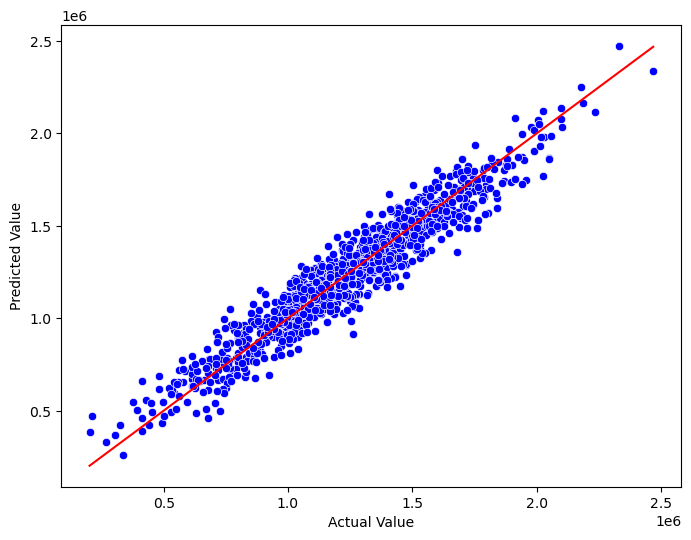

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred,color="blue")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='red')
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()